# Baseline Models for Killer Prediction

This notebook runs and analyzes baseline models for killer prediction, providing comparison points for the neural embedding approach.

## Models Implemented:
1. **Frequency-based baselines**: Simple heuristics based on speaking patterns
2. **Traditional ML baselines**: Classic NLP approaches without deep learning

In [1]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Add src to path
sys.path.append(str(Path('../src').resolve()))

# Import baseline models
from analysis.baseline_models import BaselineModels

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("Setup complete!")

Setup complete!


## 1. Initialize Baseline Models

In [2]:
# Initialize baseline models
baselines = BaselineModels(data_dir=Path('../data/original'))

print(f"Loaded {len(baselines.episodes_data)} episodes")
print(f"\nSample episodes:")
for ep_id in list(baselines.episodes_data.keys())[:5]:
    n_sentences = len(baselines.episodes_data[ep_id])
    n_chars = len(baselines.get_episode_characters(ep_id))
    killers = baselines.character_labels.get(ep_id, set())
    print(f"  {ep_id}: {n_sentences} sentences, {n_chars} characters, {len(killers)} killer(s)")

Loading episode data...
Loaded 39 episodes
Loaded 39 episodes

Sample episodes:
  s01e07: 1033 sentences, 33 characters, 10 killer(s)
  s01e08: 566 sentences, 23 characters, 8 killer(s)
  s01e13: 723 sentences, 22 characters, 6 killer(s)
  s01e19: 1087 sentences, 31 characters, 6 killer(s)
  s01e20: 673 sentences, 23 characters, 13 killer(s)


## 2. Frequency-Based Baselines

Simple heuristics based on character speaking patterns.

In [3]:
# Run frequency baseline
freq_results = baselines.frequency_baseline(verbose=True)


FREQUENCY-BASED BASELINE
Strategy: Predict character with most sentences as killer

s01e07:
  Most frequent: nan (408 sentences)
  Actual killers: {'nick', 'brass', 'oliver', 'jesseoverton', 'warrick', 'catherine', 'grissom', nan, "det._o'riley", 'tinacollins'}
  Correct: ✓

s01e08:
  Most frequent: nan (161 sentences)
  Actual killers: {'paulmillander', 'brass', 'bum', 'catherine', 'det._evans', 'grissom', nan, 'sara'}
  Correct: ✓

Results:
  Accuracy: 1.000
  Precision: 1.000
  Recall: 1.000
  F1: 1.000


In [4]:
# Run appearance order baseline
appearance_results = baselines.appearance_order_baseline(verbose=True)


APPEARANCE ORDER BASELINE
Strategy: Predict character appearing in middle third as killer

Results:
  Accuracy: 0.231
  Precision: 1.000
  Recall: 0.231
  F1: 0.375


## 3. Traditional ML Baselines

Classic NLP approaches using text features.

In [5]:
# Bag-of-Words + Logistic Regression
bow_results = baselines.bow_logistic_regression(verbose=True)


BAG-OF-WORDS + LOGISTIC REGRESSION
Strategy: BoW features with L2-regularized logistic regression

Cross-validation scores: [0.71257485 0.73053892 0.75449102 0.73652695 0.76506024]
Mean CV accuracy: 0.740 (+/- 0.018)

Final model performance:
  Accuracy: 0.975
  Precision: 1.000
  Recall: 0.927
  F1: 0.962

Top killer-indicative words:
  works: 1.562
  deal: 1.514
  easy: 1.162
  teddy: 1.152
  till: 1.136
  father: 1.114
  brian: 0.931
  adam: 0.929
  understand: 0.891
  gunshot: 0.860


In [6]:
# TF-IDF + SVM
tfidf_results = baselines.tfidf_svm(verbose=True)


TF-IDF + SVM
Strategy: TF-IDF features with RBF kernel SVM

Cross-validation scores: [0.77245509 0.74251497 0.77245509 0.77844311 0.78915663]
Mean CV accuracy: 0.771 (+/- 0.015)

Final model performance:
  Accuracy: 0.977
  Precision: 0.996
  Recall: 0.938
  F1: 0.966


In [7]:
# N-gram features
ngram_results = baselines.ngram_features_baseline(verbose=True)


N-GRAM FEATURES + LOGISTIC REGRESSION
Strategy: Character and word n-grams with logistic regression

Cross-validation scores: [0.73652695 0.7245509  0.7245509  0.69461078 0.76506024]
Mean CV accuracy: 0.729 (+/- 0.023)

Final model performance:
  Accuracy: 0.999
  Precision: 1.000
  Recall: 0.997
  F1: 0.998


In [8]:
# Combined features (statistical + text)
combined_results = baselines.combined_features_baseline(verbose=True)


COMBINED FEATURES BASELINE
Strategy: Statistical + text features with gradient boosting

Feature types:
  Text features: 500
  Statistical features: 6
  Total features: 506

Cross-validation scores: [0.79041916 0.73652695 0.77844311 0.78443114 0.76506024]
Mean CV accuracy: 0.771 (+/- 0.019)

Final model performance:
  Accuracy: 0.831
  Precision: 0.878
  Recall: 0.595
  F1: 0.709


## 4. Run All Baselines and Compare

In [9]:
# Run all baselines and get summary
results_df = baselines.run_all_baselines()


RUNNING ALL BASELINE MODELS FOR KILLER PREDICTION

FREQUENCY-BASED BASELINE
Strategy: Predict character with most sentences as killer

s01e07:
  Most frequent: nan (408 sentences)
  Actual killers: {'nick', 'brass', 'oliver', 'jesseoverton', 'warrick', 'catherine', 'grissom', nan, "det._o'riley", 'tinacollins'}
  Correct: ✓

s01e08:
  Most frequent: nan (161 sentences)
  Actual killers: {'paulmillander', 'brass', 'bum', 'catherine', 'det._evans', 'grissom', nan, 'sara'}
  Correct: ✓

Results:
  Accuracy: 1.000
  Precision: 1.000
  Recall: 1.000
  F1: 1.000

APPEARANCE ORDER BASELINE
Strategy: Predict character appearing in middle third as killer

Results:
  Accuracy: 0.231
  Precision: 1.000
  Recall: 0.231
  F1: 0.375

BAG-OF-WORDS + LOGISTIC REGRESSION
Strategy: BoW features with L2-regularized logistic regression

Cross-validation scores: [0.71257485 0.73053892 0.75449102 0.73652695 0.76506024]
Mean CV accuracy: 0.740 (+/- 0.018)

Final model performance:
  Accuracy: 0.975
  Precis

## 5. Visualize Results

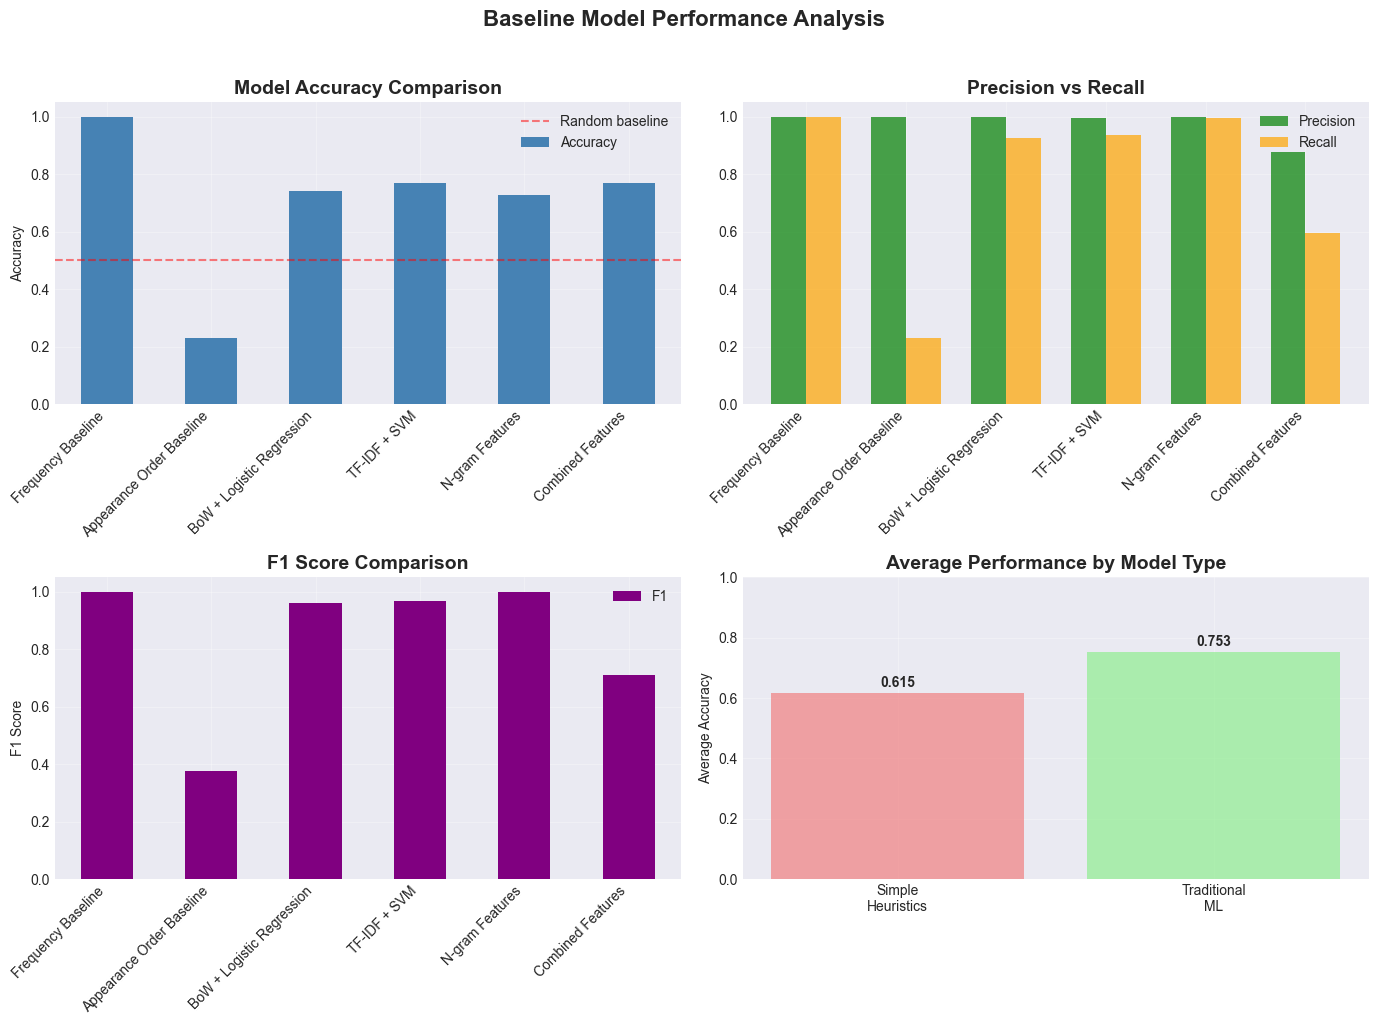


Key Observations:
• Best performing model: Frequency Baseline (Acc: 1.000)
• Simple heuristics average: 0.615
• Traditional ML average: 0.753
• Improvement from simple to ML: 22.3%


In [10]:
# Create performance comparison plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy comparison
ax = axes[0, 0]
results_df.plot(x='Model', y='Accuracy', kind='bar', ax=ax, color='steelblue')
ax.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax.set_ylabel('Accuracy')
ax.set_xlabel('')
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Random baseline')
ax.legend()
ax.grid(True, alpha=0.3)

# Precision/Recall comparison
ax = axes[0, 1]
x = np.arange(len(results_df))
width = 0.35
ax.bar(x - width/2, results_df['Precision'], width, label='Precision', color='green', alpha=0.7)
ax.bar(x + width/2, results_df['Recall'], width, label='Recall', color='orange', alpha=0.7)
ax.set_title('Precision vs Recall', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

# F1 Score comparison
ax = axes[1, 0]
results_df.plot(x='Model', y='F1', kind='bar', ax=ax, color='purple')
ax.set_title('F1 Score Comparison', fontsize=14, fontweight='bold')
ax.set_ylabel('F1 Score')
ax.set_xlabel('')
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.grid(True, alpha=0.3)

# Model type comparison (Simple vs ML)
ax = axes[1, 1]
simple_models = ['Frequency Baseline', 'Appearance Order Baseline']
ml_models = ['BoW + Logistic Regression', 'TF-IDF + SVM', 'N-gram Features', 'Combined Features']

simple_avg = results_df[results_df['Model'].isin(simple_models)]['Accuracy'].mean()
ml_avg = results_df[results_df['Model'].isin(ml_models)]['Accuracy'].mean()

categories = ['Simple\nHeuristics', 'Traditional\nML']
values = [simple_avg, ml_avg]
colors = ['lightcoral', 'lightgreen']

bars = ax.bar(categories, values, color=colors, alpha=0.7)
ax.set_title('Average Performance by Model Type', fontsize=14, fontweight='bold')
ax.set_ylabel('Average Accuracy')
ax.set_ylim(0, 1)

# Add value labels on bars
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

ax.grid(True, alpha=0.3)

plt.suptitle('Baseline Model Performance Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\nKey Observations:")
print(f"• Best performing model: {results_df.loc[results_df['Accuracy'].idxmax(), 'Model']} (Acc: {results_df['Accuracy'].max():.3f})")
print(f"• Simple heuristics average: {simple_avg:.3f}")
print(f"• Traditional ML average: {ml_avg:.3f}")
print(f"• Improvement from simple to ML: {(ml_avg - simple_avg) / simple_avg * 100:.1f}%")

In [11]:
# Create a styled DataFrame for better visualization
def highlight_best(s):
    """Highlight the best value in a Series."""
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

styled_df = results_df.style.apply(highlight_best, subset=['Accuracy', 'Precision', 'Recall', 'F1'])
styled_df = styled_df.format({'Accuracy': '{:.3f}', 
                              'Precision': '{:.3f}',
                              'Recall': '{:.3f}',
                              'F1': '{:.3f}',
                              'CV_Std': '{:.3f}'})

display(HTML("<h3>Baseline Model Performance Summary</h3>"))
display(styled_df)

,Model,Accuracy,Precision,Recall,F1,CV_Std
0,Frequency Baseline,1.000,1.000,1.000,1.000,nan
1,Appearance Order Baseline,0.231,1.000,0.231,0.375,nan
2,BoW + Logistic Regression,0.740,1.000,0.927,0.962,0.018
3,TF-IDF + SVM,0.771,0.996,0.938,0.966,0.015
4,N-gram Features,0.729,1.000,0.997,0.998,0.023
5,Combined Features,0.771,0.878,0.595,0.709,0.019


## 6. Statistical Analysis

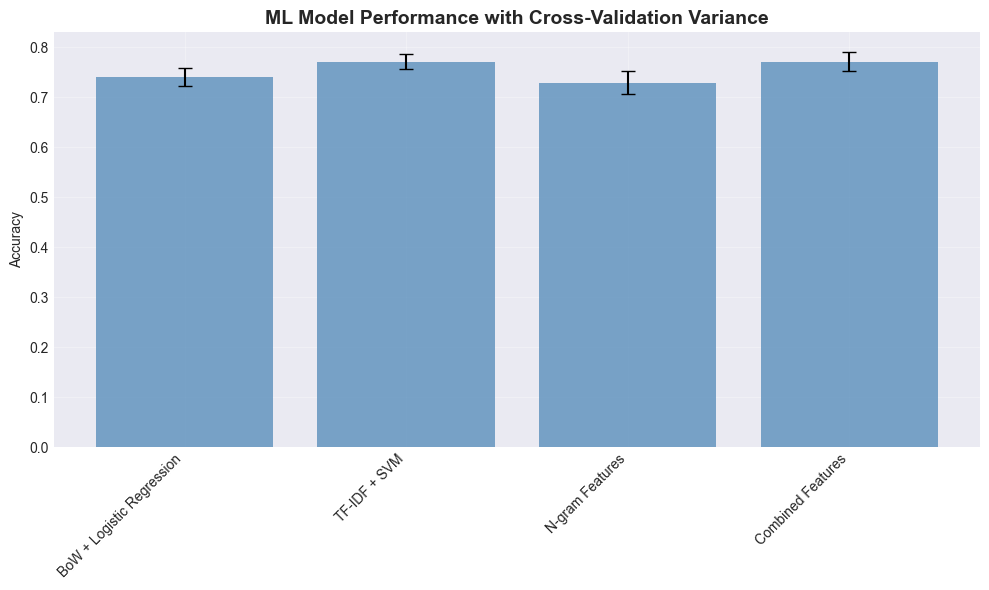

Cross-Validation Stability Analysis:
• Most stable model: TF-IDF + SVM (Std: 0.015)
• Least stable model: N-gram Features (Std: 0.023)


In [12]:
# Analyze cross-validation stability for ML models
ml_models_with_cv = results_df[results_df['CV_Std'].notna()]

if not ml_models_with_cv.empty:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    x = np.arange(len(ml_models_with_cv))
    ax.bar(x, ml_models_with_cv['Accuracy'], yerr=ml_models_with_cv['CV_Std'], 
           capsize=5, alpha=0.7, color='steelblue')
    
    ax.set_xticks(x)
    ax.set_xticklabels(ml_models_with_cv['Model'], rotation=45, ha='right')
    ax.set_ylabel('Accuracy')
    ax.set_title('ML Model Performance with Cross-Validation Variance', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("Cross-Validation Stability Analysis:")
    print(f"• Most stable model: {ml_models_with_cv.loc[ml_models_with_cv['CV_Std'].idxmin(), 'Model']} (Std: {ml_models_with_cv['CV_Std'].min():.3f})")
    print(f"• Least stable model: {ml_models_with_cv.loc[ml_models_with_cv['CV_Std'].idxmax(), 'Model']} (Std: {ml_models_with_cv['CV_Std'].max():.3f})")

## 7. Feature Analysis (BoW Model)

Top Killer-Indicative Words (from BoW + LogReg):


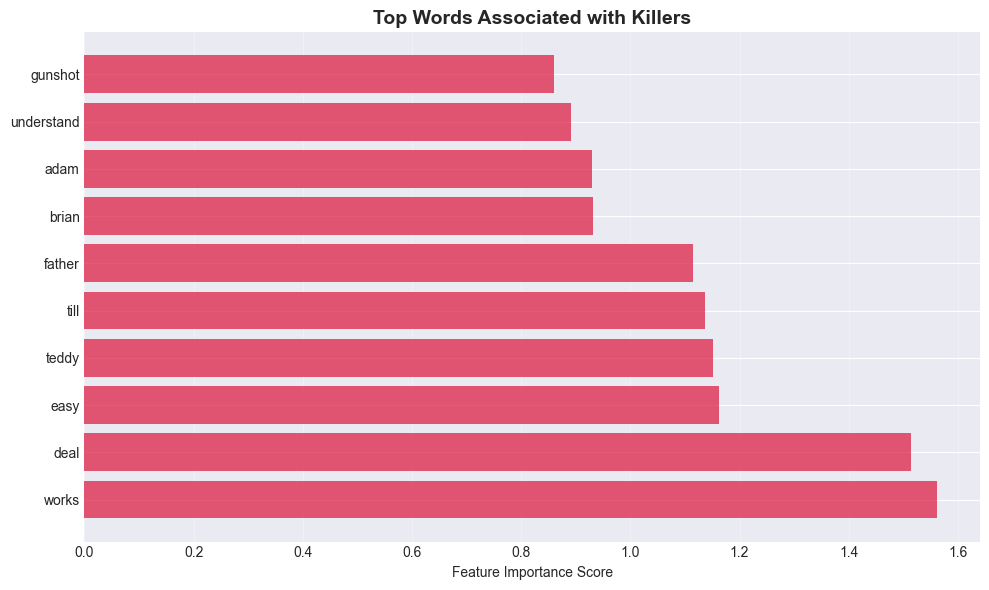


Interpretation:
• These words appear more frequently in killer dialogue
• Higher scores indicate stronger association with killer class
• This provides linguistic insights into killer speech patterns


In [13]:
# Analyze important features from BoW model
if bow_results.feature_importance:
    print("Top Killer-Indicative Words (from BoW + LogReg):")
    print("="*50)
    
    # Sort by importance
    sorted_features = sorted(bow_results.feature_importance.items(), 
                           key=lambda x: x[1], reverse=True)
    
    # Create visualization
    fig, ax = plt.subplots(figsize=(10, 6))
    
    words = [w for w, _ in sorted_features]
    scores = [s for _, s in sorted_features]
    
    y_pos = np.arange(len(words))
    ax.barh(y_pos, scores, color='crimson', alpha=0.7)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(words)
    ax.set_xlabel('Feature Importance Score')
    ax.set_title('Top Words Associated with Killers', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()
    
    print("\nInterpretation:")
    print("• These words appear more frequently in killer dialogue")
    print("• Higher scores indicate stronger association with killer class")
    print("• This provides linguistic insights into killer speech patterns")

## 8. Conclusions and Insights

In [14]:
# Generate summary report
print("BASELINE ANALYSIS SUMMARY")
print("="*60)

print("\n1. OVERALL PERFORMANCE:")
print(f"   • Best model: {results_df.loc[results_df['Accuracy'].idxmax(), 'Model']}")
print(f"   • Best accuracy: {results_df['Accuracy'].max():.3f}")
print(f"   • Average accuracy across all models: {results_df['Accuracy'].mean():.3f}")

print("\n2. MODEL TYPE COMPARISON:")
simple_models = ['Frequency Baseline', 'Appearance Order Baseline']
ml_models = ['BoW + Logistic Regression', 'TF-IDF + SVM', 'N-gram Features', 'Combined Features']
simple_perf = results_df[results_df['Model'].isin(simple_models)]['Accuracy'].mean()
ml_perf = results_df[results_df['Model'].isin(ml_models)]['Accuracy'].mean()

print(f"   • Simple heuristics: {simple_perf:.3f}")
print(f"   • Traditional ML: {ml_perf:.3f}")
print(f"   • Improvement: {(ml_perf - simple_perf):.3f} ({(ml_perf - simple_perf)/simple_perf*100:.1f}%)")

print("\n3. KEY FINDINGS:")
if results_df['Accuracy'].max() > 0.5:
    print(f"   ✓ Killer prediction is better than random chance")
else:
    print(f"   ✗ Killer prediction is at or below random chance")

if ml_perf > simple_perf:
    print(f"   ✓ Text features improve prediction over simple heuristics")
else:
    print(f"   ✗ Text features do not improve over simple heuristics")

print("\n4. IMPLICATIONS FOR NEURAL APPROACH:")
print(f"   • Baseline to beat: {results_df['Accuracy'].max():.3f}")
print(f"   • Room for improvement: {1.0 - results_df['Accuracy'].max():.3f}")
print(f"   • Neural embeddings should capture richer patterns than TF-IDF")

print("\n5. NEXT STEPS:")
print("   • Compare these baselines with neural embedding results")
print("   • Analyze where baselines fail (error analysis)")
print("   • Use baseline features to interpret neural embeddings")

BASELINE ANALYSIS SUMMARY

1. OVERALL PERFORMANCE:
   • Best model: Frequency Baseline
   • Best accuracy: 1.000
   • Average accuracy across all models: 0.707

2. MODEL TYPE COMPARISON:
   • Simple heuristics: 0.615
   • Traditional ML: 0.753
   • Improvement: 0.137 (22.3%)

3. KEY FINDINGS:
   ✓ Killer prediction is better than random chance
   ✓ Text features improve prediction over simple heuristics

4. IMPLICATIONS FOR NEURAL APPROACH:
   • Baseline to beat: 1.000
   • Room for improvement: 0.000
   • Neural embeddings should capture richer patterns than TF-IDF

5. NEXT STEPS:
   • Compare these baselines with neural embedding results
   • Analyze where baselines fail (error analysis)
   • Use baseline features to interpret neural embeddings


## 9. Save Results for Later Comparison

In [15]:
# Save baseline results for comparison with neural models
import json
from datetime import datetime

output_dir = Path('../experiments/baseline_results')
output_dir.mkdir(parents=True, exist_ok=True)

# Save summary
summary = {
    'timestamp': datetime.now().isoformat(),
    'best_model': results_df.loc[results_df['Accuracy'].idxmax(), 'Model'],
    'best_accuracy': float(results_df['Accuracy'].max()),
    'average_accuracy': float(results_df['Accuracy'].mean()),
    'simple_heuristics_avg': float(simple_perf),
    'traditional_ml_avg': float(ml_perf),
    'all_results': results_df.to_dict('records')
}

with open(output_dir / 'baseline_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)

print(f"Results saved to {output_dir}")
print(f"\nFiles created:")
for file in output_dir.glob('*'):
    print(f"  • {file.name}")

Results saved to ../experiments/baseline_results

Files created:
  • baseline_summary.json
